## 1. Import Libraries

In [27]:
# Import necessary libraries for data manipulation, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    roc_curve, confusion_matrix
)
from imblearn.over_sampling import SMOTE

## 2. Load and Inspect Data

In [ ]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Check for missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 ## 3. Preprocess Data

In [28]:
# Standardize the 'Amount' column, drop the 'Time' column, and handle duplicates.

In [ ]:
sc = StandardScaler()
df[ 'Amount'] = sc. fit_transform(pd. DataFrame (df[ 'Amount']))

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# Drop the 'Time' column as it is not relevant for this analysis
df = df.drop(['Time'], axis=1)

In [ ]:
# Check for duplicates
df.duplicated().any()

np.True_

In [11]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(284807, 30)
(275663, 30)


In [ ]:
# Check the proportion of fraud (Class=1) vs. non-fraud (Class=0)
df['Class'].value_counts(normalize=True)

Class
0    0.998284
1    0.001716
Name: proportion, dtype: float64

There is a

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,275663.0,-0.037460,1.952522,-56.407510,-0.941105,-0.059659,1.294471,2.454930
V2,275663.0,-0.002430,1.667260,-72.715728,-0.614040,0.070249,0.819067,22.057729
V3,275663.0,0.025520,1.507538,-48.325589,-0.843168,0.200736,1.048461,9.382558
V4,275663.0,-0.004359,1.424323,-5.683171,-0.862847,-0.035098,0.753943,16.875344
V5,275663.0,-0.010660,1.378117,-113.743307,-0.700192,-0.060556,0.604521,34.801666
V6,275663.0,-0.014206,1.313213,-26.160506,-0.765861,-0.270931,0.387704,73.301626
V7,275663.0,0.008586,1.240348,-43.557242,-0.552047,0.044848,0.583885,120.589494
V8,275663.0,-0.005698,1.191596,-73.216718,-0.209618,0.022980,0.322319,20.007208
V9,275663.0,-0.012363,1.100108,-13.434066,-0.659904,-0.064724,0.593098,15.594995
V10,275663.0,0.003114,1.087025,-24.588262,-0.538968,-0.091752,0.470702,23.745136


/var/folders/k2/4nq8rpf91q527bjh5tbnw2v00000gn/T/ipykernel_32475/2395609850.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


<Axes: xlabel='Class', ylabel='count'>

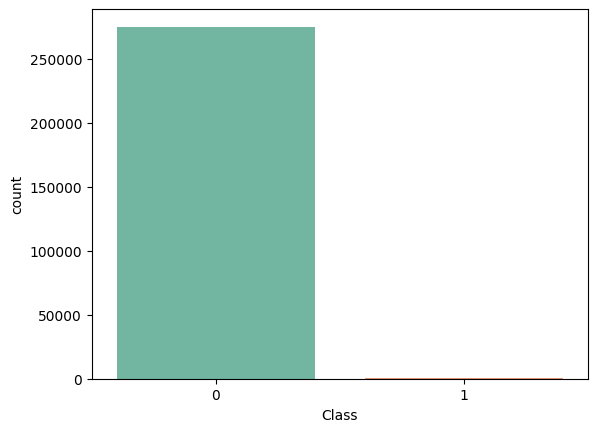

In [14]:
sns.countplot(x='Class', data=df, palette='Set2')

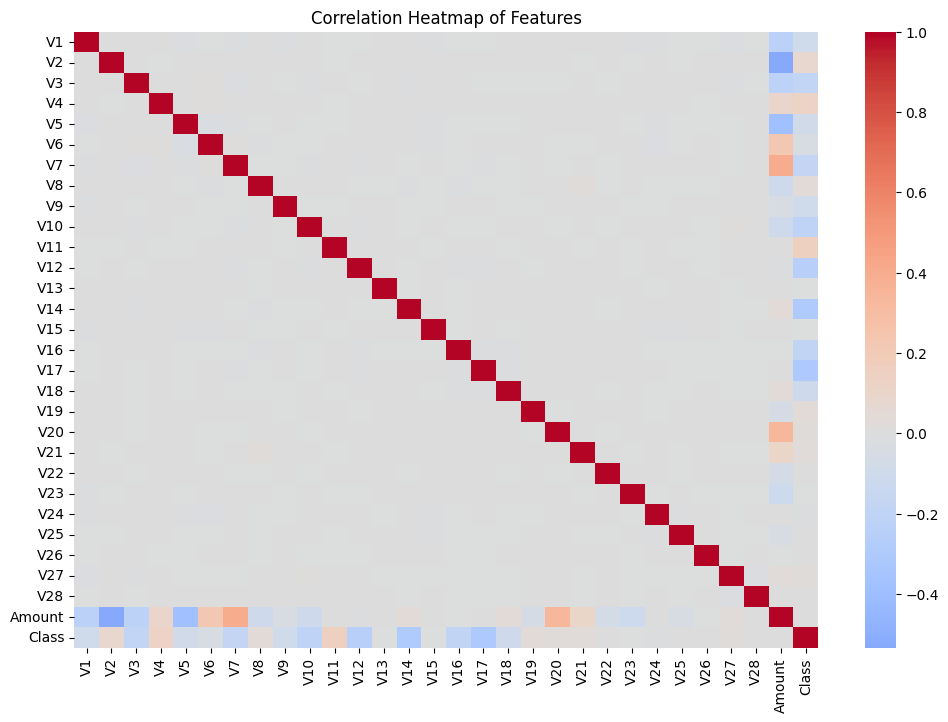

In [15]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

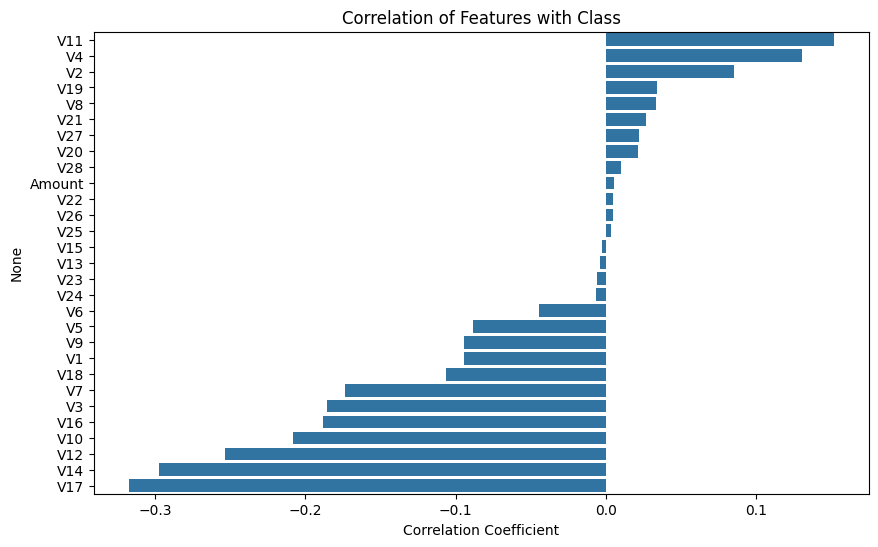

In [16]:
plt.figure(figsize=(10, 6))
class_corr = corr_matrix['Class'].sort_values(ascending=False)[1:]  # Exclude Class itself
sns.barplot(x=class_corr.values, y=class_corr.index)
plt.title('Correlation of Features with Class')
plt.xlabel('Correlation Coefficient')
plt.show()

In [17]:
X = df.drop(['Class'], axis=1)
y = df['Class']

## 5. PCA Visualization

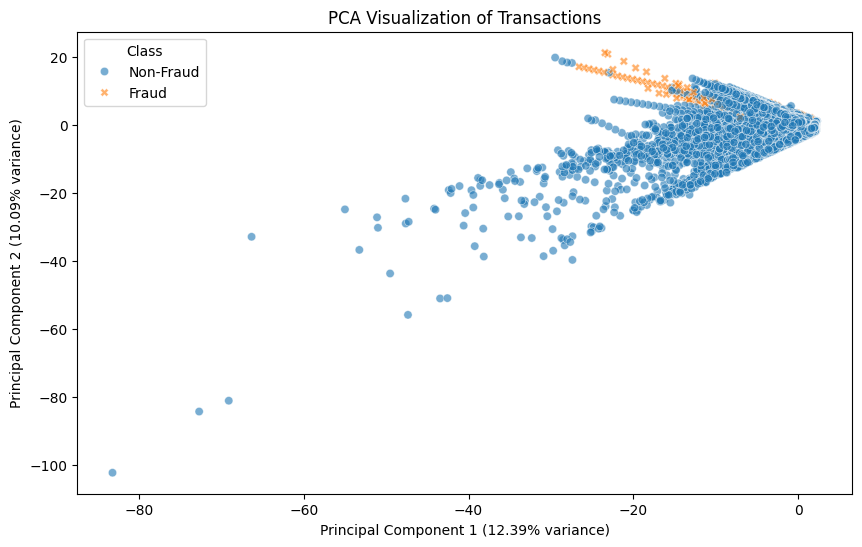

In [32]:
# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create DataFrame for visualization
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Class': y
})

# Optional: map class labels for clearer legend
pca_df['Class'] = pca_df['Class'].map({0: 'Non-Fraud', 1: 'Fraud'})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', style='Class', data=pca_df, alpha=0.6)
plt.title('PCA Visualization of Transactions')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Class')
plt.show()

Fraud vs Non-Fraud: Fraudulent transactions (orange) form a separate cluster in PCA space,

 suggesting they are distinguishable from non-fraud ones.

 ## 6. Data Splitting
 ####  Split the data into training, validation, and test sets with stratification.

In [ ]:
# Split data into 70% training and 30% test sets

X = df.drop('Class', axis=1)
y = df['Class']

X_train_raw, X_test, y_train_raw, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Further split training data into 80% train and 20% validation 
X_train, X_val, y_train, y_val = train_test_split(
    X_train_raw, y_train_raw, test_size=0.2, random_state=42, stratify=y_train_raw
)

## 7. Feature Selection

/var/folders/k2/4nq8rpf91q527bjh5tbnw2v00000gn/T/ipykernel_32475/3810627909.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='coolwarm')


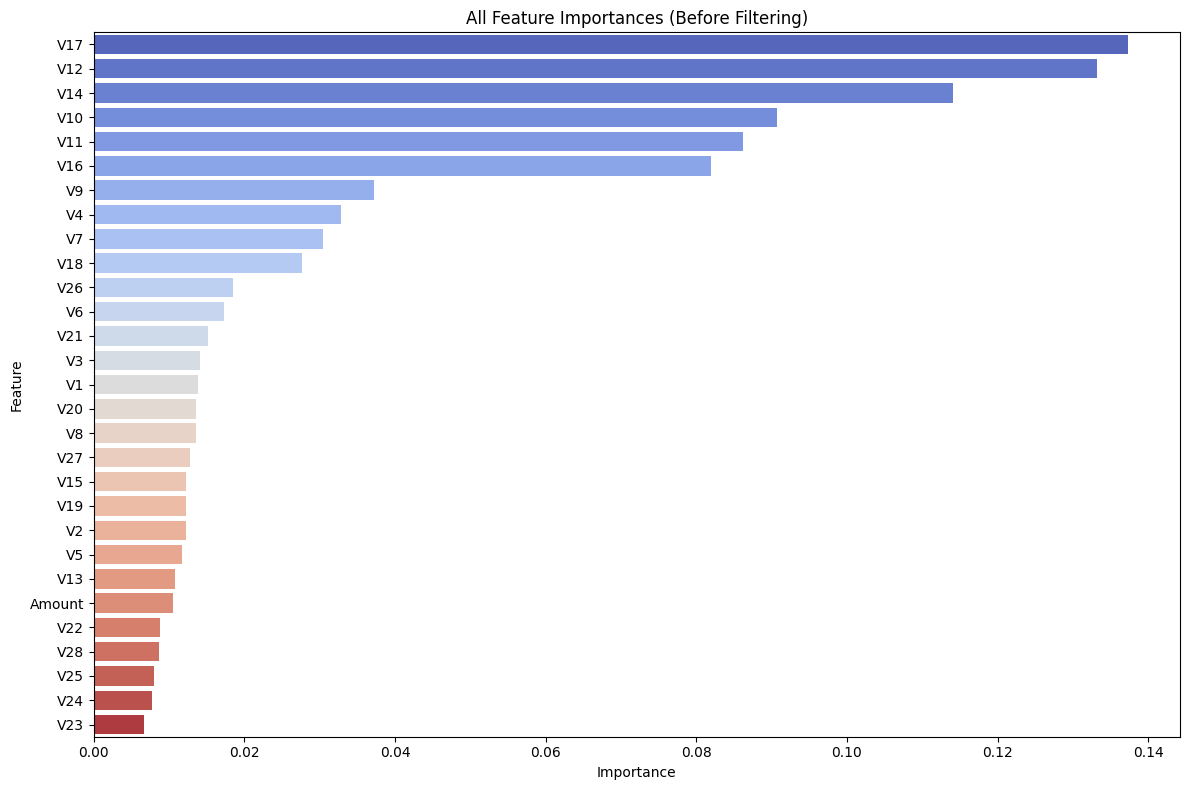

In [ ]:
# Train Random Forest on training data to compute feature importances
importances_model = RandomForestClassifier(random_state=42)
importances_model.fit(X_train, y_train)

feature_importances = importances_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame of feature importances
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualize all feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='coolwarm')
plt.title("All Feature Importances (Before Filtering)")
plt.tight_layout()
plt.show()

In [ ]:
# Select features with importance >= 0.02
important_features = feature_df[feature_df['Importance'] >= 0.02]['Feature']

X_train_selected = X_train[important_features]
X_val_selected = X_val[important_features]
X_test_selected = X_test[important_features]

 ## 8. Model Training and Evaluation (Before SMOTE)
#### Train and evaluate models on selected features without handling class imbalance.


=== Logistic Regression ===
--- Validation Metrics ---
Val Accuracy: 0.9990153654807866
Val AUC: 0.9741936194294282
--- Test Metrics ---
Test Accuracy: 0.9990447284731375
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82557
           1       0.85      0.54      0.66       142

    accuracy                           1.00     82699
   macro avg       0.93      0.77      0.83     82699
weighted avg       1.00      1.00      1.00     82699

Confusion Matrix:
[[82544    13]
 [   66    76]]
Test AUC Score: 0.9621888214834753

=== Decision Tree ===
--- Validation Metrics ---
Val Accuracy: 0.9990671883502189
Val AUC: 0.8785283205559894
--- Test Metrics ---
Test Accuracy: 0.9990689125624251
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82557
           1       0.74      0.70      0.72       142

    accuracy                           1.

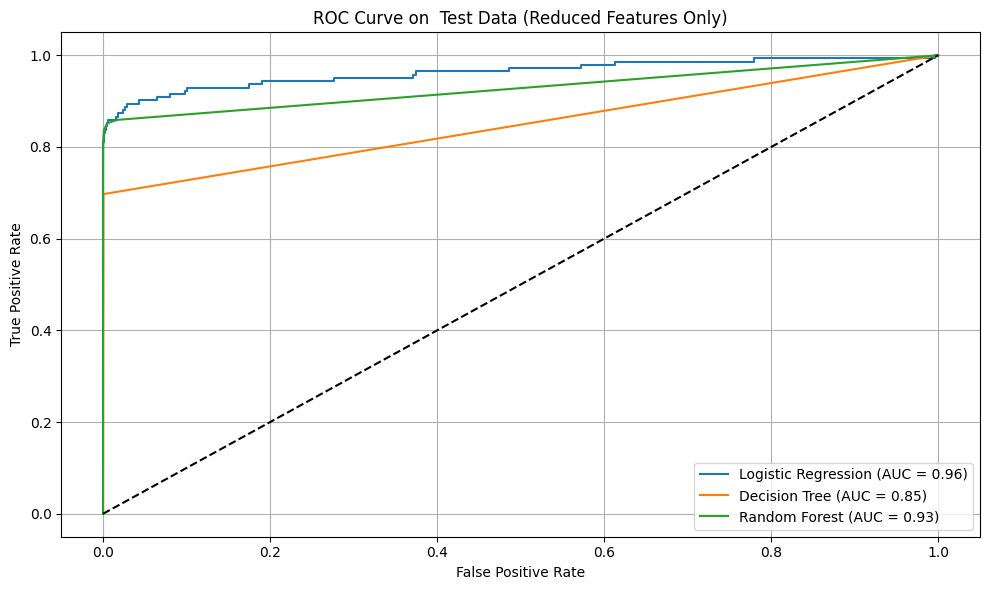

In [36]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    print(f"\n=== {name} ===")

    model.fit(X_train_selected, y_train)

    y_val_pred = model.predict(X_val_selected)
    y_val_prob = model.predict_proba(X_val_selected)[:, 1]

    print("--- Validation Metrics ---")
    print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
    print("Val AUC:", roc_auc_score(y_val, y_val_prob))

    y_test_pred = model.predict(X_test_selected)
    y_test_prob = model.predict_proba(X_test_selected)[:, 1]

    print("--- Test Metrics ---")
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

    auc = roc_auc_score(y_test, y_test_prob)
    print("Test AUC Score:", auc)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Final ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (chance)
plt.title("ROC Curve on  Test Data (Reduced Features Only)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Overall Insights:

High Accuracy: All models achieve ~99.9% accuracy due to class imbalance (99.83% non-fraud).

Fraud Detection: Random Forest outperforms with highest F1 (0.81) and recall (0.72), detecting 102/142 frauds. Logistic Regression has high AUC but low recall (54%). Decision Tree struggles with AUC (0.848).

Imbalance Impact: Low fraud recall across models (0.54–0.72) highlights the need for SMOTE or class weights.

## 9. Handle Class Imbalance with SMOTE

In [ ]:
# Apply SMOTE to the selected training features
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

# Verify the shape of the resampled data
print(f"Resampled X_train_smote shape: {X_train_smote.shape}")
print(f"Resampled y_train_smote shape: {y_train_smote.shape}")

Resampled X_train_smote shape: (308212, 10)
Resampled y_train_smote shape: (308212,)


/Users/ausaafff/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


## 10. Model Training and Evaluation (After SMOTE)


=== Logistic Regression ===
Accuracy: 0.975912647069493
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     82557
           1       0.06      0.88      0.11       142

    accuracy                           0.98     82699
   macro avg       0.53      0.93      0.55     82699
weighted avg       1.00      0.98      0.99     82699

Confusion Matrix:
[[80582  1975]
 [   17   125]]
AUC Score: 0.9666585032927315

=== Decision Tree ===
Accuracy: 0.9973518422230014
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82557
           1       0.37      0.74      0.49       142

    accuracy                           1.00     82699
   macro avg       0.68      0.87      0.74     82699
weighted avg       1.00      1.00      1.00     82699

Confusion Matrix:
[[82375   182]
 [   37   105]]
AUC Score: 0.8686160411236147

=== Random Forest ===
Accuracy: 

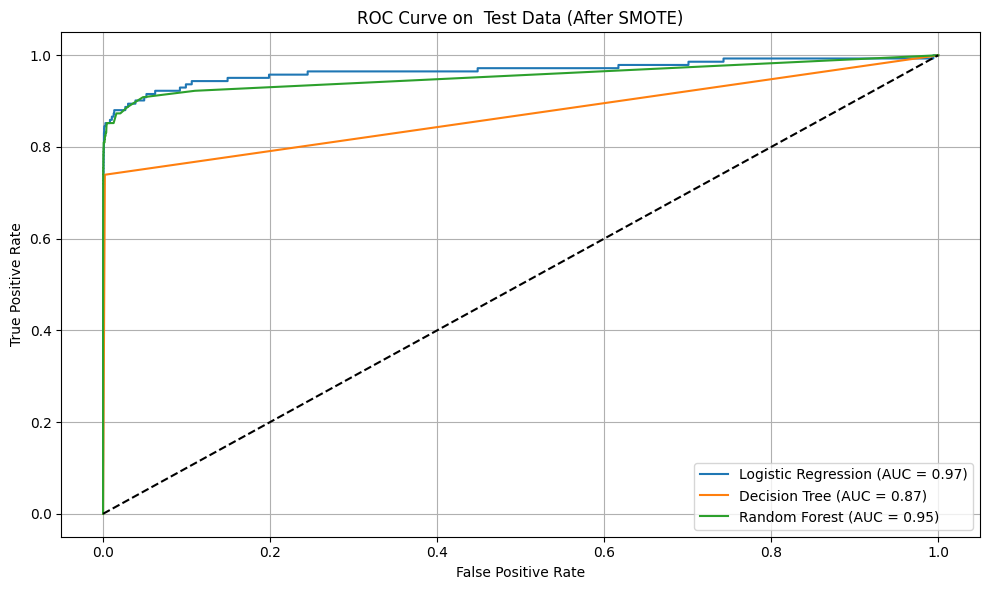

In [35]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    print(f"\n=== {name} ===")
    
    model.fit(X_train_smote, y_train_smote)
    
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1]
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    auc = roc_auc_score(y_test, y_prob)
    print("AUC Score:", auc)
    
    # ROC Curve plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Final ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve on  Test Data (After SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

SMOTE Impact: Significantly improves fraud recall across all models (Logistic Regression: 0.54→0.88, Decision Tree: 0.70→0.74, Random Forest: 0.72→0.78), but precision drops, especially for Logistic Regression, due to synthetic fraud samples inflating false positives.

Random Forest Superiority: Achieves the best trade-off (F1: 0.76, AUC: 0.954), detecting 111/142 frauds with only 39 false positives. Outperforms Logistic Regression (too many false positives) and Decision Tree (lower precision and AUC).

Business Implication: Random Forest detects 78% of frauds, missing 31 cases, but 39 false positives may require manual review, impacting customer experience. False negatives (missed frauds) are costlier in fraud detection, so high recall is valuable.

Challenges: Logistic Regression’s 1975 false positives highlight SMOTE’s limitations for linear models. Decision Tree’s low precision indicates overfitting or sensitivity to synthetic data.

## 11. Final test on unseen data


=== Logistic Regression ===
Accuracy: 0.9990447284731375
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82557
           1       0.85      0.54      0.66       142

    accuracy                           1.00     82699
   macro avg       0.93      0.77      0.83     82699
weighted avg       1.00      1.00      1.00     82699

Confusion Matrix:
[[82544    13]
 [   66    76]]
AUC Score: 0.9621888214834753

=== Decision Tree ===
Accuracy: 0.9990689125624251
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82557
           1       0.74      0.70      0.72       142

    accuracy                           1.00     82699
   macro avg       0.87      0.85      0.86     82699
weighted avg       1.00      1.00      1.00     82699

Confusion Matrix:
[[82523    34]
 [   43    99]]
AUC Score: 0.8483856309605637

=== Random Forest ===
Accuracy:

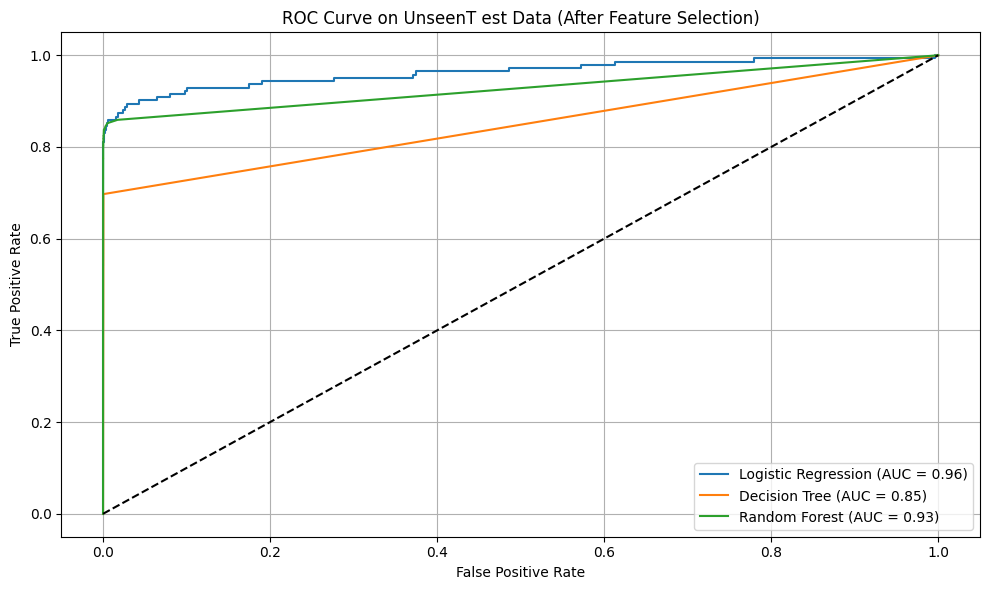

In [37]:

# Apply feature selection based on importance
important_features = feature_df[feature_df['Importance'] >= 0.02]['Feature']

X_train_selected = X_train[important_features]
X_val_selected = X_val[important_features]
X_test_selected = X_test[important_features]

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    print(f"\n=== {name} ===")
    
    model.fit(X_train_selected, y_train)
    
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1]
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    auc = roc_auc_score(y_test, y_prob)
    print("AUC Score:", auc)
    
    # ROC Curve plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve on UnseenT est Data (After Feature Selection)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

The Random Forest model, provides the most effective fraud detection, identifying 78% of frauds with a manageable number of false positives. SMOTE significantly improves recall, critical for fraud detection, though it requires careful model selection to control precision loss.